In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path = "/Users/Alexander/Documents/MSP/PRA1500 Tools for Practical Physics/Session 1 - Intro to tools/Least Squares Analysis Data.csv"

,Days Since 5th Case,Total Cases
0,44,26551
1,43,25587
2,42,24413
3,41,23097
4,40,21762
5,39,20549
6,38,19580
7,37,18803
8,36,17851
9,35,16627


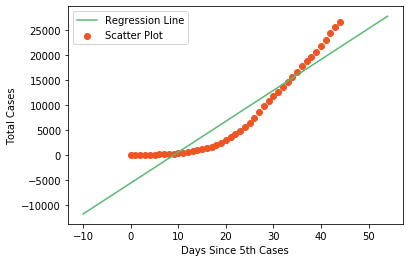

Root Mean Square Error:  2875.3220513624874
R squared:  0.886223183445468


In [23]:
def Least_Squares_Analysis(path,dependant,independant):
    
    covid_data = pd.read_csv(path)
    
    y = covid_data[dependant].values
    x = covid_data[independant].values
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    n = len(x)
    
    numerator = 0
    denomenator = 0
    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denomenator += (x[i] - x_mean)**2
        m = numerator / denomenator
        c = y_mean - (m * x_mean)
    
    max_x = np.max(x) + 10
    min_x = np.min(x) - 10
    
    lin = np.linspace(min_x,max_x,1000)
    curve = m * lin + c
    
    # Calculating Root Mean Squares Error
    rmse = 0
    for i in range(n):
        y_pred = c + m * x[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    
    # Calculating R2 Score
    ss_tot = 0
    ss_res = 0
    for i in range(n):
        y_pred = c + m * x[i]
        ss_tot += (y[i] - y_mean) ** 2
        ss_res += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_res/ss_tot)
    
    return lin,curve,x,y,rmse,r2
    

# independant = input("What's the Column name for the independant variable? ")
# dependant = input("What's the Column name for the dependant variable? ")

# Ploting Line
x = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[0]
y = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[1]
X = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[2]
Y = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[3]
rmse = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[4]
r2 = Least_Squares_Analysis(path, "Total Cases","Days Since 5th Case")[5]



plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Days Since 5th Cases')
plt.ylabel('Total Cases')
plt.legend()
plt.show()
print("Root Mean Square Error: ",rmse)
print("R squared: ",r2)